In [1]:
import sys
sys.path.append('../../component')
from utils import *
from run_LSTM import set_lstm_data, run_lstm, lstm_eval
from run_Transformer import set_trans_data, run_transformer, transformer_eval
from run_EDA import run_eda
import os
os.getcwd()

'/home/ubuntu/Capstone_Group_1/code/main_code/test'

In [2]:
'''EDA'''
path = '../../data/power_consumption.csv'
target = 'power_consumption'
ts_plt, acf, acf_pacf, rolling_mean_var, decomposition = run_eda(path, 100, 144)

In [3]:
df_train, df_test, train, test = prepare_arima_data(path, target)
print('Train shape', train.shape, '\nTest shape', test.shape)

Train shape (41932, 1) 
Test shape (10484, 1)


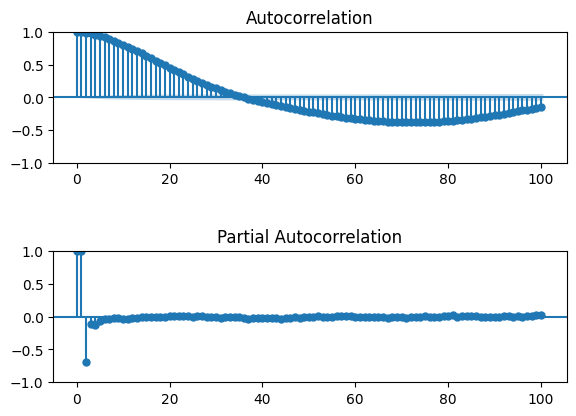

In [9]:
acf_pacf

In [ ]:
# Optuna to find AR order
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=None, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=20)

In [ ]:
# Optuna to find MA order
study_ma, best_order_list_ma = optuna_search_ARIMA(train, test,
                                                   ar_max=None, ma_max=20, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=30)

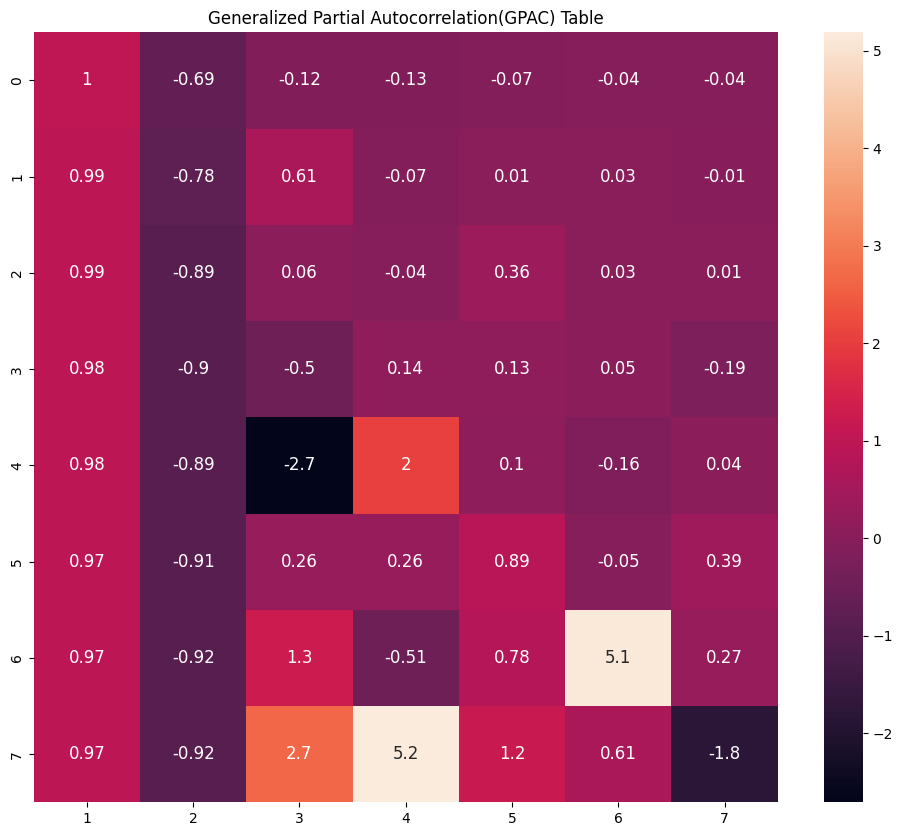

In [4]:
fig = GPAC_table(train, J=8, K=8) 
fig.savefig('../main/pdf/pow_1.pdf', dpi=300, bbox_inches="tight")

In [ ]:
# Optuna to find ARMA order
study_arma, best_order_list_arma = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=10, integ_max=None,
                                                   objective=ARIMA_objective, n_trials=30)

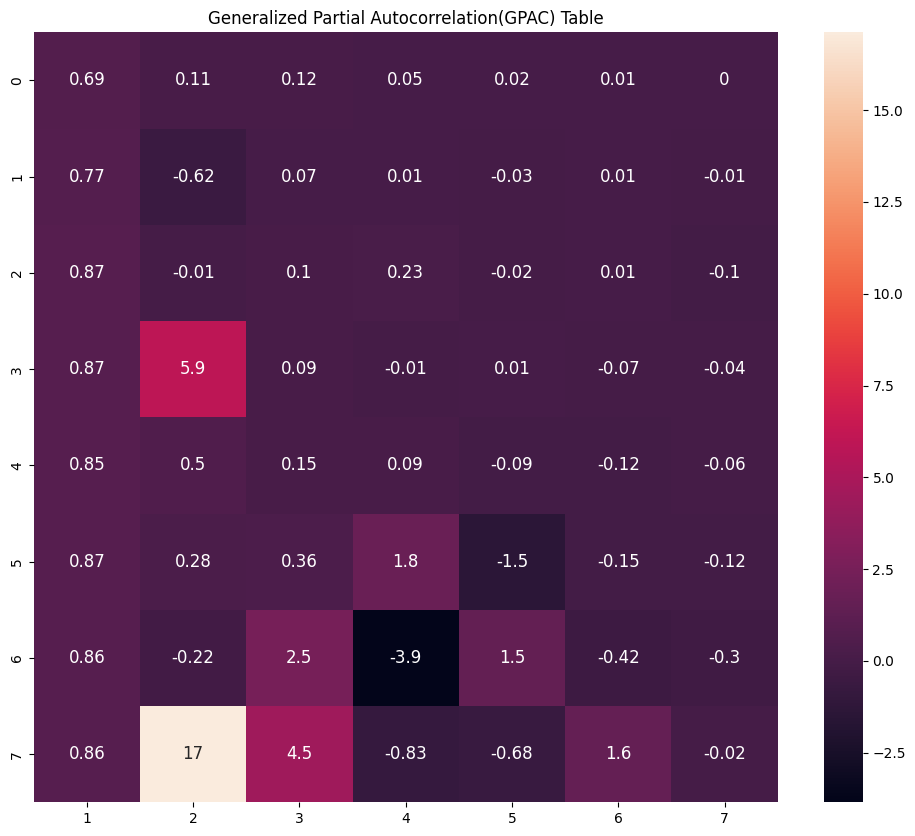

In [5]:
# perform a fist-order differencing than GPAC
diff = differencing(df_train, 1, 'power_consumption')
diff_data = np.array(diff).reshape(-1, 1)
fig = GPAC_table(diff_data, J=8, K=8)
fig.savefig('../main/pdf/pow_2.pdf', dpi=300, bbox_inches="tight")

In [ ]:
# Optuna to find ARIMA order
study_arima, best_order_list_arima = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=10, integ_max=1,
                                                   objective=ARIMA_objective, n_trials=30)

In [4]:
target = 'power_consumption'
dataset = 'pow'
seq_length = 6

In [5]:
# LSTM
model_name = 'lstm'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.18919710
Epoch [11/100], Loss: 0.00137368
Epoch [21/100], Loss: 0.00059543
Epoch [31/100], Loss: 0.00055663
Epoch [41/100], Loss: 0.00054978
Epoch [51/100], Loss: 0.00054610
Epoch [61/100], Loss: 0.00054671
Epoch [71/100], Loss: 0.00054363
Epoch [81/100], Loss: 0.00054226
Epoch [91/100], Loss: 0.00054339
loss: 0.0004103898508019927


150572.5

In [7]:
# BiLSTM
model_name='Bilstm'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.12955421
Epoch [11/100], Loss: 0.00133167
Epoch [21/100], Loss: 0.00060246
Epoch [31/100], Loss: 0.00056160
Epoch [41/100], Loss: 0.00055576
Epoch [51/100], Loss: 0.00055400
Epoch [61/100], Loss: 0.00055209
Epoch [71/100], Loss: 0.00055004
Epoch [81/100], Loss: 0.00054854
Epoch [91/100], Loss: 0.00054515
loss: 0.0004188844528781795


153693.6

In [9]:
# Seq2seq
model_name='seq2seq'

train_loader, test_loader, scaler, actual_test = set_lstm_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.17327501
Epoch [11/100], Loss: 0.00168515
Epoch [21/100], Loss: 0.00116306
Epoch [31/100], Loss: 0.00105777
Epoch [41/100], Loss: 0.00100158
Epoch [51/100], Loss: 0.00091480
Epoch [61/100], Loss: 0.00083741
Epoch [71/100], Loss: 0.00075916
Epoch [81/100], Loss: 0.00073685
Epoch [91/100], Loss: 0.00068446
loss: 0.0005312369092546472


194885.34

In [ ]:
# transformer
seq_length = 6
epoches = 100

train_loader, test_loader, scaler, actual_test = set_trans_data(path, target, seq_length)
model = run_transformer(dataset, train_loader, epoches)
predictions = transformer_eval(dataset, model, test_loader, scaler)